In [1]:
import networkx as nx
from copy import deepcopy
import math
import numpy as np
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt

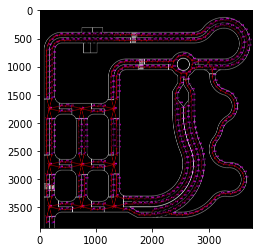

In [3]:
G = nx.read_graphml('comp_track.graphml')
import cv2
img=cv2.imread("Competition_track.png")
plt.imshow(img)

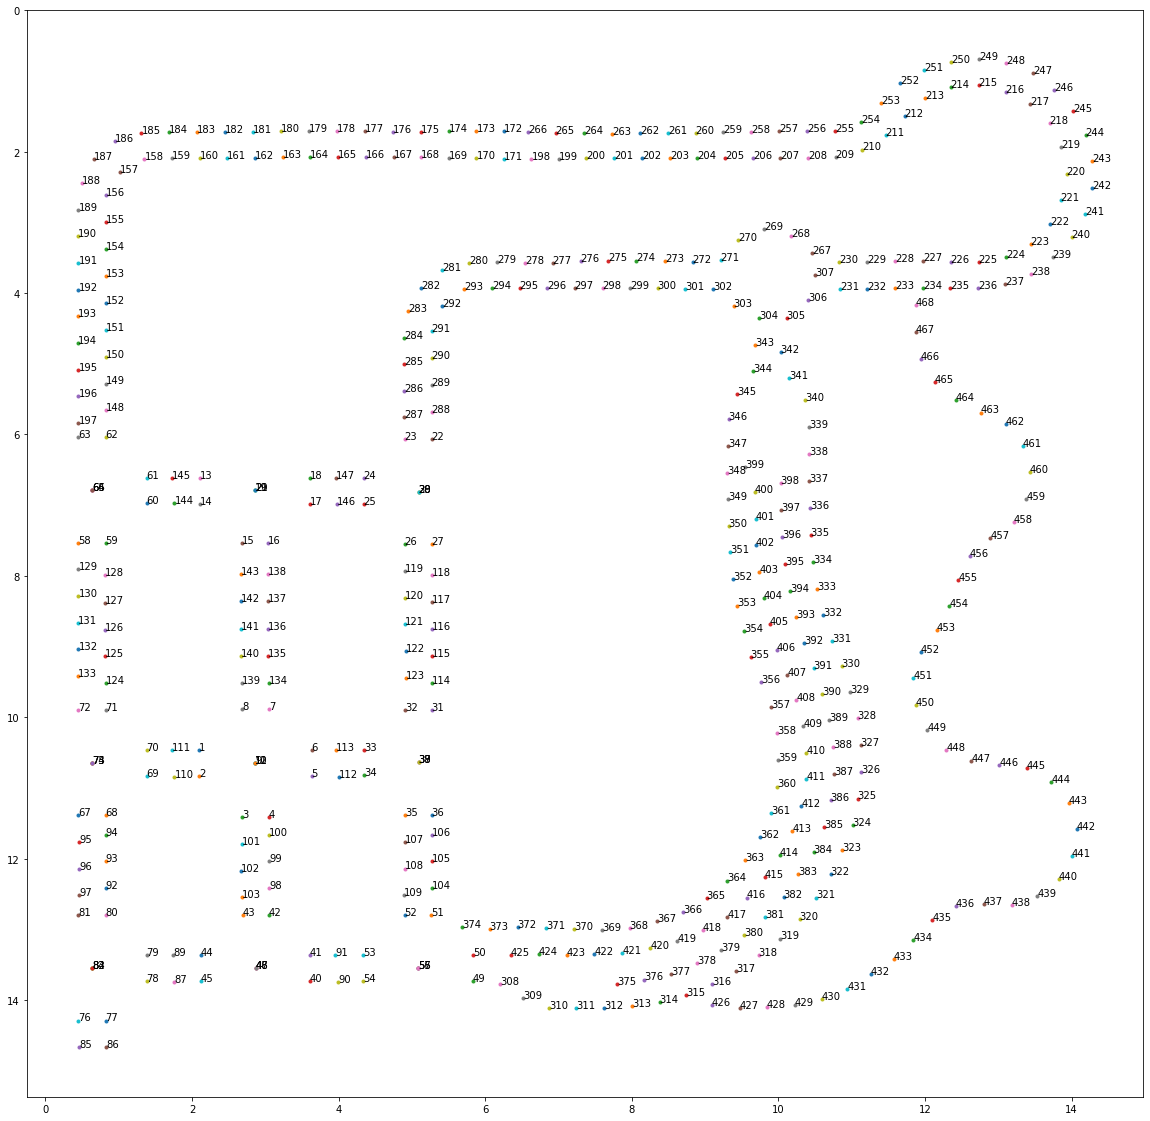

In [4]:
plt.figure(figsize=(20,20))
for node,data in G.nodes(data=True):
    plt.plot(data['x'],data['y'],'.')
    ax = plt.gca()
    ax.annotate(str(node), (data['x'],data['y'])) 

ax = plt.gca()
ax.invert_yaxis()

In [5]:
for i in G.neighbors('112'):
    print(i)

34


In [6]:
for i in G.neighbors('10'):
    print(i)

5
7
8
1


In [7]:
import heapq

def dijkstra(G, start, target):
    d = {start: 0}
    parent = {start: None}
    pq = [(0, start)]
    visited = set()
    while pq:
        du, u = heapq.heappop(pq)
        if u in visited:
            continue
        if u == target:
            break
        visited.add(u)
        for v  in G.adj[u]:
            if v not in d or d[v] > du + 1:
                d[v] = du + 1
                parent[v] = u
                heapq.heappush(pq, (d[v], v))

    
    fp = [target]
    tg = target
    ptype=[("lk" if len([i for i in G.neighbors(tg)])<2 else "int")]
    
    while tg != start:
        fp.insert(0, parent[tg])
        tg = parent[tg]
        ptype.insert(0,("lk" if len([i for i in G.neighbors(tg)])<2 else "int"))
        # print([i for i in G.neighbors(tg)])
    
    ptyperet=ptype.copy()
    for i in range(len(ptype)):
        if ptype[i]=='int':
            try:
                ptyperet[i-1]="int"
            except:
                pass
            try:
                ptyperet[i+1]="int"
                i+=1
            except:
                pass
    
    edgeret=[]
    
    for i in range(len(fp)-1):
        dt=G.get_edge_data(fp[i],fp[i+1])
        edgeret.append(dt['dotted'])
        
    edgeret.append(None)
        
            
    return fp,ptyperet,edgeret

In [21]:
path_list=dijkstra(G,'86','169')

In [22]:
path_list

(['86',
  '77',
  '82',
  '80',
  '92',
  '93',
  '94',
  '68',
  '73',
  '71',
  '124',
  '125',
  '126',
  '127',
  '128',
  '59',
  '64',
  '62',
  '148',
  '149',
  '150',
  '151',
  '152',
  '153',
  '154',
  '155',
  '156',
  '157',
  '158',
  '159',
  '160',
  '161',
  '162',
  '163',
  '164',
  '165',
  '166',
  '167',
  '168',
  '169'],
 ['lk',
  'int',
  'int',
  'int',
  'lk',
  'lk',
  'lk',
  'int',
  'int',
  'int',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'int',
  'int',
  'int',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk'],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  Tr

In [23]:
G.edges('10',data=True)

OutEdgeDataView([('10', '5', {'dotted': False}), ('10', '7', {'dotted': False}), ('10', '8', {'dotted': False}), ('10', '1', {'dotted': False})])

In [24]:
node_dict=G.nodes(data=True)

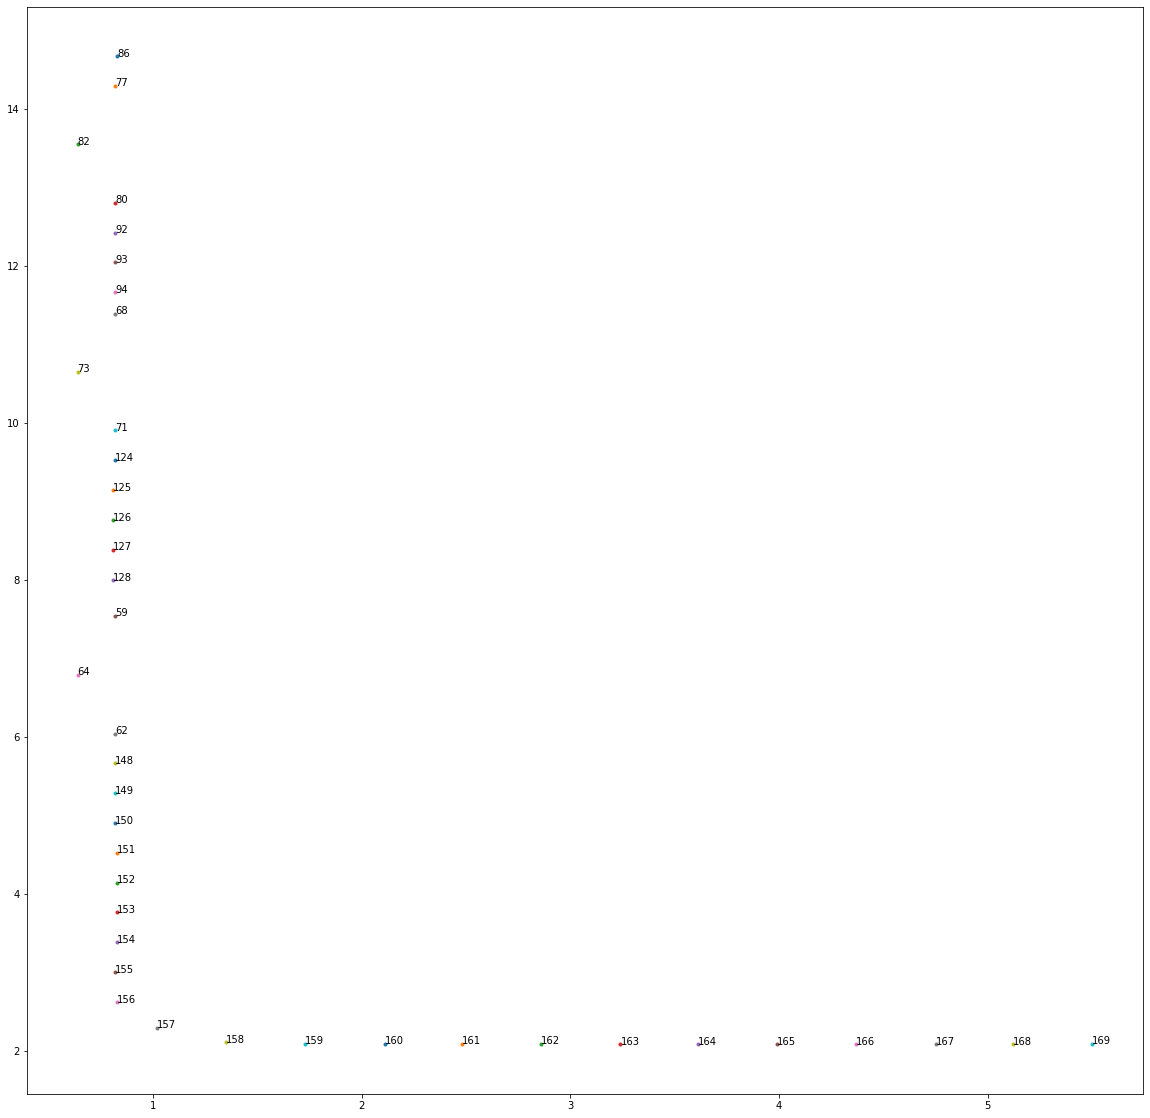

In [25]:
coord_list=[]
plt.figure(figsize=(20,20))
for i in path_list[0]:
    data=node_dict[i]
    plt.plot(data['x'],data['y'],'.')
    coord_list.append([data['x'],data['y']])
    ax = plt.gca()
    ax.annotate(str(i), (data['x'],data['y'])) 

In [26]:
import numpy as np
from scipy.interpolate import interp1d # Different interface to the same function
import matplotlib.pyplot as plt
coordlist_new=[]
sizeincrease=0
count=0
countfinal=len(coord_list)
print(countfinal)

path_list_new=path_list[1].copy()
edge_list_new=path_list[2].copy()

while count<countfinal:
    if path_list[1][count]=="int":
        
        

        #pts = np.array([...]) # Your points

            # append first point
        coordlist_new.append(coord_list[count])
        # find midpoint of intersection start and end
        xmidint=(coord_list[count][0]+coord_list[count+2][0])/2
        ymidint=(coord_list[count][1]+coord_list[count+2][1])/2

        xfinmid=(2*xmidint+coord_list[count+1][0])/3
        yfinmid=(2*ymidint+coord_list[count+1][1])/3
        
        pts=[coord_list[count],(xfinmid,yfinmid),coord_list[count+2]]
        
        x,y=zip(*pts)
        
        i = np.arange(len(x))

        # 5x the original number of points
        interp_i = np.linspace(0, i.max(), 5 * i.max())

        xi = interp1d(i, x, kind='quadratic')(interp_i)
        yi = interp1d(i, y, kind='quadratic')(interp_i)
        
        for i in range(len(xi)):
            coordlist_new.append((xi[i],yi[i]))
            path_list_new.insert(count+sizeincrease,"int")
            edge_list_new.insert(count+sizeincrease,False)
            sizeincrease+=1
        
        
        # coordlist_new.append((xfinmid,yfinmid))
        coordlist_new.append(coord_list[count+2])
        count+=3
        # count+=3
    else:
        coordlist_new.append(coord_list[count])
        count+=1

40


In [27]:
coordlist_new,path_list_new,edge_list_new

([[0.83, 14.67],
  [0.82, 14.29],
  (0.82, 14.29),
  (0.7962962962962963, 14.125102880658435),
  (0.7785185185185184, 13.960041152263374),
  (0.7666666666666668, 13.794814814814815),
  (0.7607407407407407, 13.629423868312758),
  (0.7607407407407407, 13.463868312757203),
  (0.7666666666666666, 13.29814814814815),
  (0.7785185185185184, 13.132263374485596),
  (0.7962962962962963, 12.966213991769548),
  (0.82, 12.8),
  [0.82, 12.8],
  [0.82, 12.42],
  [0.82, 12.04],
  [0.82, 11.66],
  [0.82, 11.39],
  (0.82, 11.39),
  (0.7962962962962963, 11.225102880658437),
  (0.7785185185185184, 11.060041152263375),
  (0.7666666666666668, 10.894814814814817),
  (0.7607407407407407, 10.729423868312757),
  (0.7607407407407407, 10.5638683127572),
  (0.7666666666666666, 10.398148148148149),
  (0.7785185185185184, 10.232263374485598),
  (0.7962962962962963, 10.066213991769548),
  (0.82, 9.9),
  [0.82, 9.9],
  [0.82, 9.52],
  [0.81, 9.14],
  [0.81, 8.76],
  [0.81, 8.38],
  [0.81, 7.99],
  [0.82, 7.54],
  (0.

In [28]:
x,y=zip(*coordlist_new)

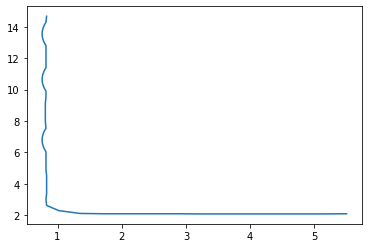

In [29]:
plt.plot(x,y)
# plt.xlim(-1,6)
# plt.ylim(-1,6)

In [30]:
x,y=zip(*coord_list)

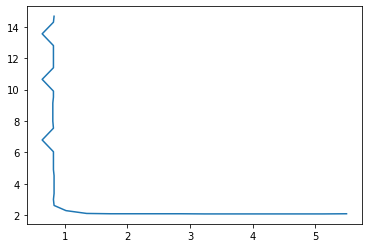

In [31]:
plt.plot(x,y)
# plt.xlim(-1,6)
# plt.ylim(-1,6)

In [3]:
import cubic_spline_planner
import matplotlib.pyplot as plt

In [15]:
ax,ay=(3.22,3.1, 2.709), (2.60985613417526, 2.3,2.134324779684454)
cx,cy,_,_,_=cubic_spline_planner.calc_spline_course(
        ax, ay, ds=0.1)

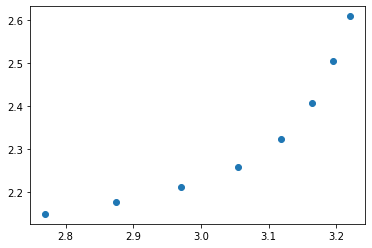

In [16]:
plt.scatter(cx,cy)

In [17]:
[i for i in zip(cx,cy)]

[(3.22, 2.60985613417526),
 (3.195056598310364, 2.5057786365701986),
 (3.163438268463328, 2.4081703605553306),
 (3.118470082301495, 2.323500527720851),
 (3.054092921646811, 2.257641527583271),
 (2.9711398784535596, 2.209785942245324),
 (2.8747672371145274, 2.174936392629301),
 (2.77019798888053, 2.1480308485577373)]